In [75]:
# ingest the data
import pandas as pd
import numpy as np

## Introduction about the data:

# The dataset: The goal is to prdict price of given diamond (Regression Analysis).

There are 10 independent variables(including id):

- id : Unique identifier of each diamond
- carat: Carat(ct.) referes to the unique unit of weight      
  mesurement used exclusively to weigh gemstones and diamonds.
- cut: Quality of diamond cut
- clarity: Diamond clarity is a measure of purity and rarity of 
  the stone. graded by the visibility of these characteristics under 10- power magnification.
- depth: The depth of diamond is it's height (in millimeteres) 
  measured from the culet(bottom tip) to the table (flat, top surface)
- table: A diamond's table is the facet which can be seen when the 
  stone is viewed face up.
- x: Diamond X dimentions.
- y: Diamind Y dimentions.
- z: Diamond Z dimentions.

# Target Variable
  - Price: Price of the given Diamond.

Dataset source link: https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv


In [76]:
df = pd.read_csv("C:/project1/notebooks/data/train.csv")

In [77]:
df

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...,...
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681


In [78]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [79]:
df.tail()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
193568,193568,0.31,Ideal,D,VVS2,61.1,56.0,4.35,4.39,2.67,1130
193569,193569,0.70,Premium,G,VVS2,60.3,58.0,5.75,5.77,3.47,2874
193570,193570,0.73,Very Good,F,SI1,63.1,57.0,5.72,5.75,3.62,3036
193571,193571,0.34,Very Good,D,SI1,62.9,55.0,4.45,4.49,2.81,681
193572,193572,0.71,Good,E,SI2,60.8,64.0,5.73,5.71,3.48,2258


In [80]:
# five random samples
df.sample(5)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
164661,164661,0.55,Ideal,E,VS2,61.9,56.0,5.24,5.22,3.23,1659
61073,61073,1.23,Ideal,E,VVS2,61.1,57.0,7.01,6.89,4.21,11146
27690,27690,1.19,Ideal,G,VS2,61.3,57.0,6.88,6.83,4.20,8109
66357,66357,1.25,Premium,H,SI1,61.9,58.0,6.93,6.88,4.27,7310
111455,111455,1.01,Ideal,G,VS2,62.1,55.0,6.39,6.36,3.96,6108


In [81]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [83]:
# id wont be neccesary for the model, so we will drop it
df.drop(columns = ['id'], inplace = True)

In [84]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [85]:
df.duplicated().sum()
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
193568    False
193569    False
193570    False
193571    False
193572    False
Length: 193573, dtype: bool

In [86]:
df.shape

(193573, 10)

In [87]:
# cat vs num columns
categorical_column = df.columns[df.dtypes == "object"]
print(categorical_column)

Index(['cut', 'color', 'clarity'], dtype='object')


In [88]:
numerical_column = df.columns[df.dtypes != "object"]
print(numerical_column)

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')


In [89]:
df[categorical_column].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [90]:
df[categorical_column]["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

https://www.vrai.com/journal/post/diamond-cut

In [91]:
df[categorical_column]["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

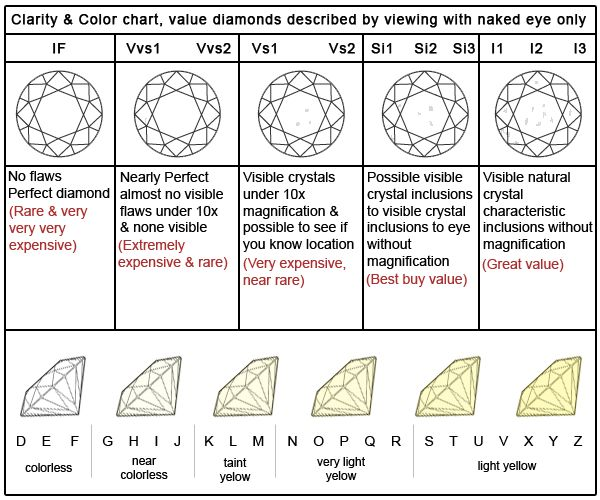
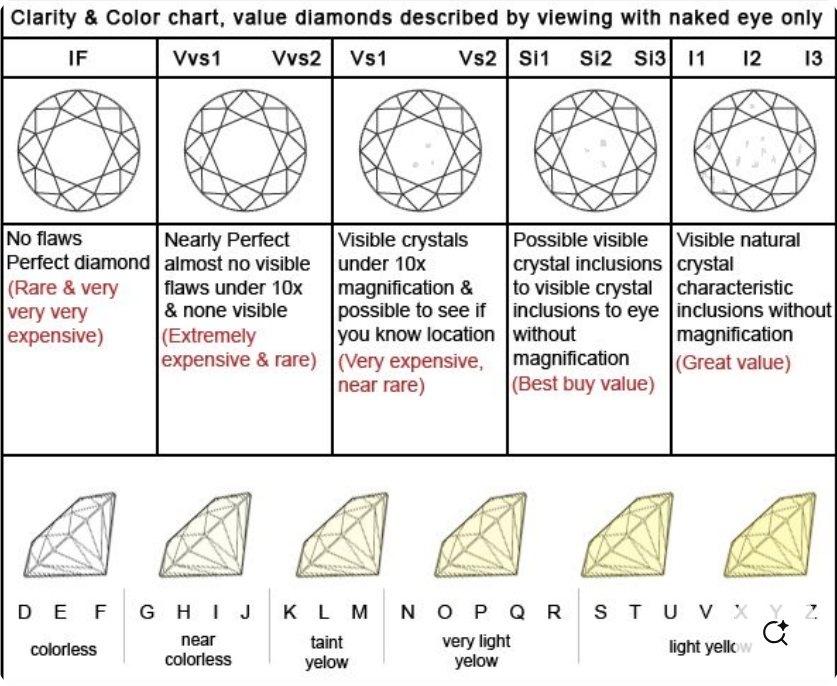

In [92]:
df[categorical_column]["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [93]:
df[numerical_column].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

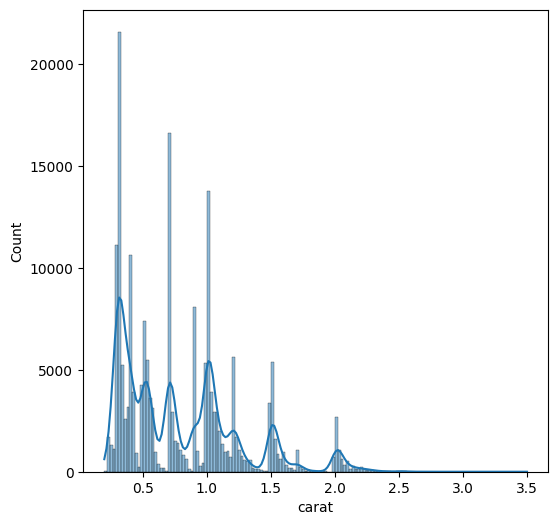

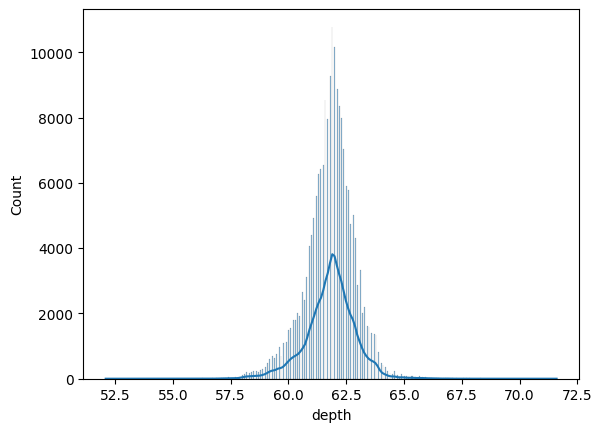

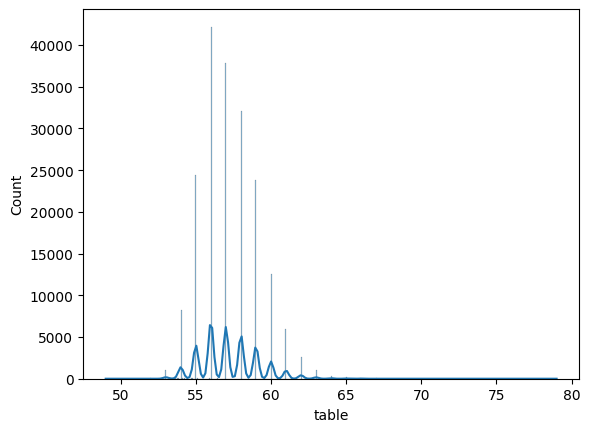

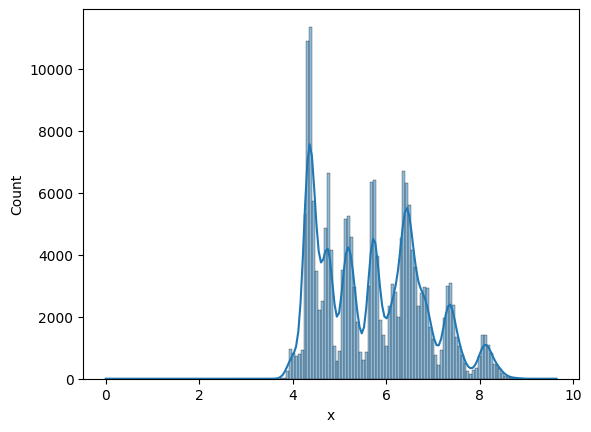

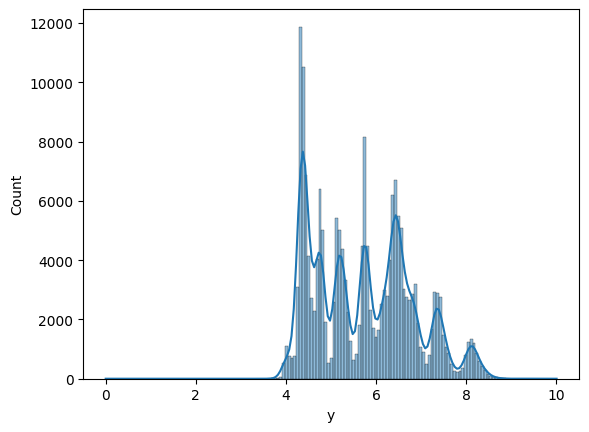

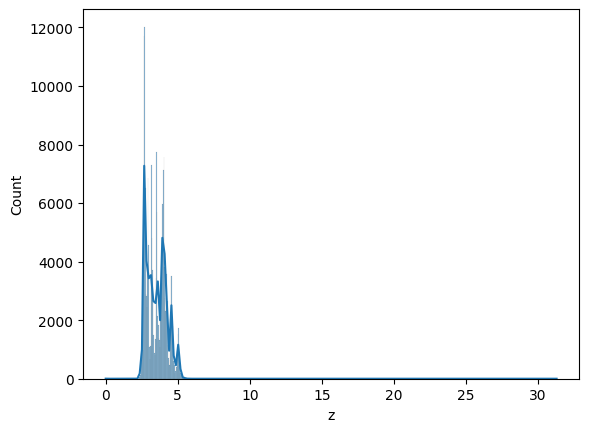

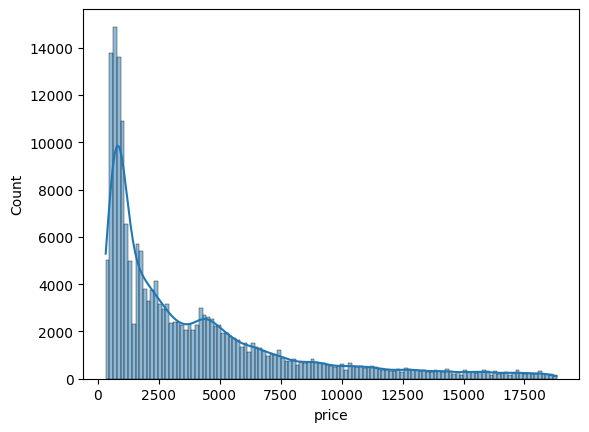

In [95]:
plt.figure(figsize = (6,6))

for col in numerical_column:
    sns.histplot(data = df, x = col, kde = True)
    print("\n")
    plt.show()

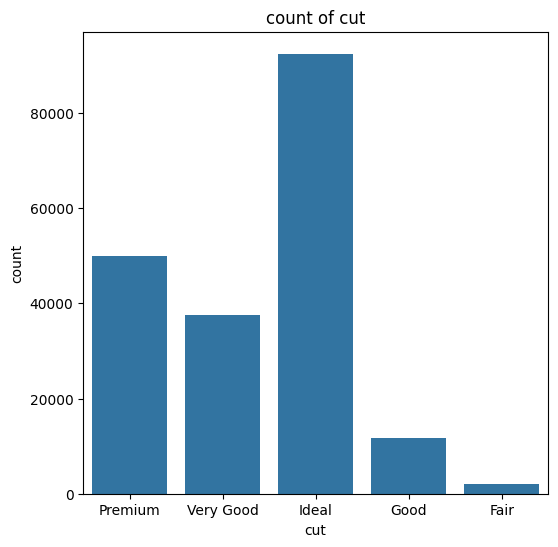

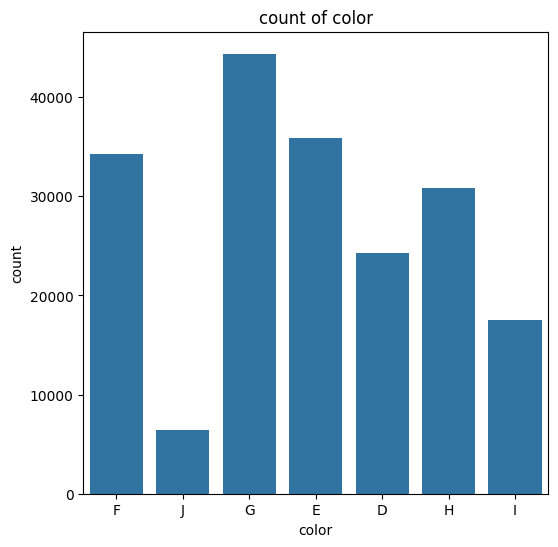

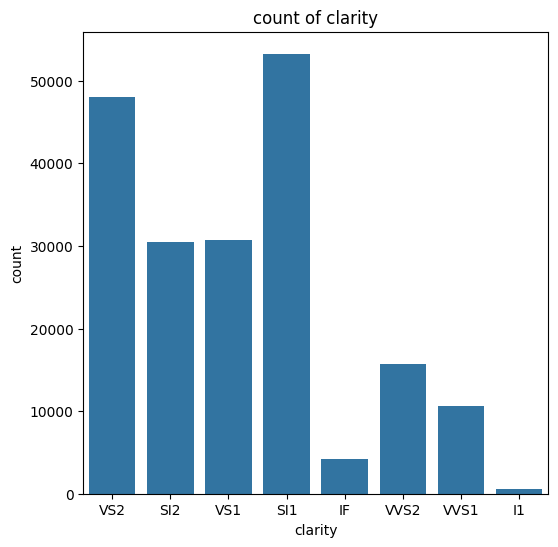

In [96]:
# categorical data
for col in categorical_column:
    plt.figure(figsize=(6,6))
    sns.countplot(data = df, x = col)
    plt.title(f"count of {col}")
    plt.show()

<Axes: >

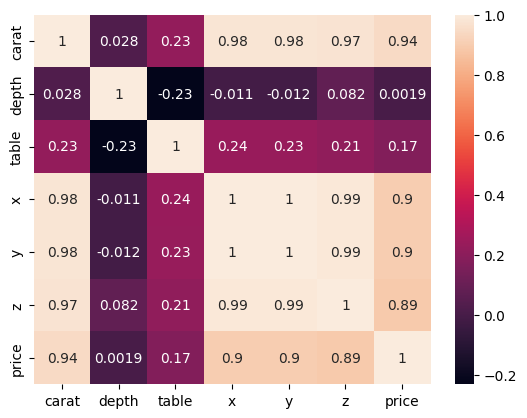

In [97]:
# coorelation matrix of numerical columns
sns.heatmap(df[numerical_column].corr(), annot=True)

In [98]:
# encoding categrorical columns
df["clarity"].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [99]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [100]:
df["color"].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [101]:
# it is called ordinal encoding, because the values have a natural order.
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

clarity_map = {
    'VS2': 4, 
    'SI2': 2, 
    'VS1': 5, 
    'SI1': 3, 
    'IF': 8, 
    'VVS2': 6, 
    'VVS1': 7, 
    'I1': 1
}

color_map = {
    'F': 3, 
    'J': 7, 
    'G': 4, 
    'E': 2, 
    'D': 1, 
    'H': 5, 
    'I': 6
}

In [102]:
# above we have used ordinal encoding, because the values have a natural order.
df["cut"]=df["cut"].map(cut_map)
df["clarity"]=df["clarity"].map(clarity_map)
df["color"]=df["color"].map(color_map)



In [104]:
# df.drop(labels='id', axis=1, inplace=True)

In [107]:
# here as you can see id is removed from the dataframe
df

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453
...,...,...,...,...,...,...,...,...,...,...
193568,0.31,5,1,6,61.1,56.0,4.35,4.39,2.67,1130
193569,0.70,4,4,6,60.3,58.0,5.75,5.77,3.47,2874
193570,0.73,3,3,3,63.1,57.0,5.72,5.75,3.62,3036
193571,0.34,3,1,3,62.9,55.0,4.45,4.49,2.81,681
